In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [14]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
X = df.iloc[:,3:5]

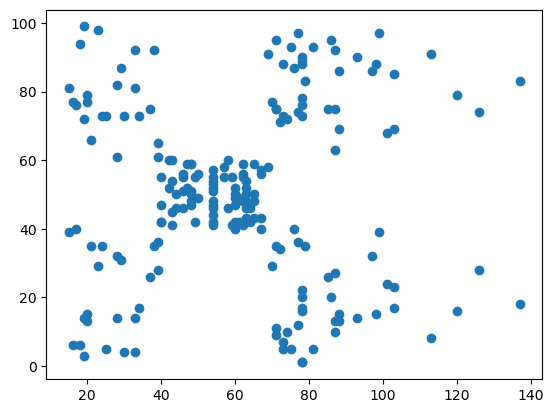

In [18]:
plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])

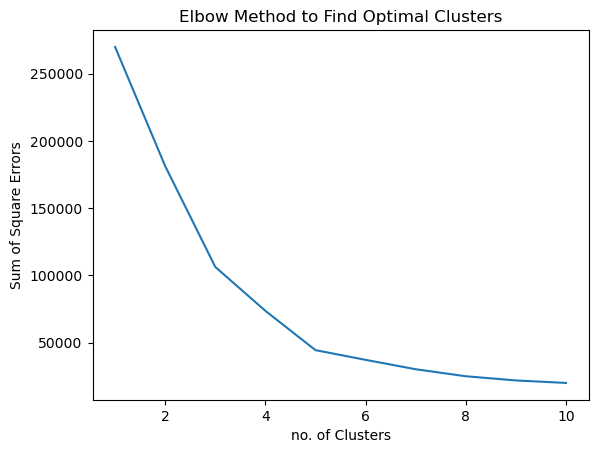

In [35]:
# using the elbow method to find the optimal Cluster

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method to Find Optimal Clusters')
plt.xlabel('no. of Clusters')
plt.ylabel('Sum of Square Errors')
plt.show()

In [23]:
# Training the model with 5 clusters
kmeans = KMeans(n_clusters=5)
y_kmeans=kmeans.fit_predict(X)

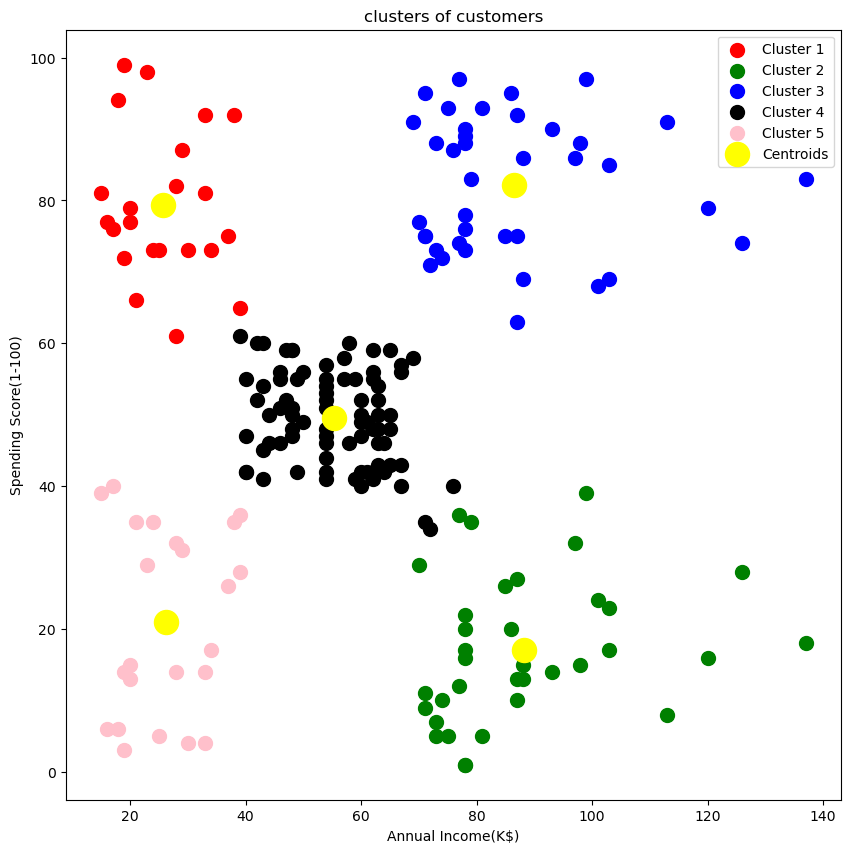

In [34]:
# Visualising The clusters
plt.figure(figsize=(10,10))
plt.scatter(x=X.iloc[y_kmeans==0,0],y=X.iloc[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x=X.iloc[y_kmeans==1,0],y=X.iloc[y_kmeans==1,1],s=100,c='green',label='Cluster 2')
plt.scatter(x=X.iloc[y_kmeans==2,0],y=X.iloc[y_kmeans==2,1],s=100,c='blue',label='Cluster 3')
plt.scatter(x=X.iloc[y_kmeans==3,0],y=X.iloc[y_kmeans==3,1],s=100,c='black',label='Cluster 4')
plt.scatter(x=X.iloc[y_kmeans==4,0],y=X.iloc[y_kmeans==4,1],s=100,c='pink',label='Cluster 5')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.savefig('clusters of Customers.jpeg')
plt.legend()
plt.show()

In [ ]:
# Output
# Cluster 1 : Group of Customer having Less Annual Income but High Spending Score 
# Cluster 2 : Group of Customer having High Annual Income but Low Spending Score 
# Cluster 3 : Group of Customer having High Annual Income but High Spending Score 
# Cluster 4 : Group of Customer having Average Annual Income and Average Spending Score 
# Cluster 5 : Group of Customer having Less Annual Income but less Spending Score 